## DESARROLLO DE CODIGO 


In [248]:
#PATH
import sys
import os

sys.path.append(os.path.abspath("../values"))

In [249]:
#Importaciones
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from cleaning import clean_policies, clean_etica

In [250]:
#import de prueba
import cleaning
dir(cleaning)


['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__warningregistry__',
 'clean_countries',
 'clean_dates',
 'clean_etica',
 'clean_policies',
 'clean_strings',
 'drop_fully_null_rows',
 'log_dimensions',
 'normalize_columns',
 'np',
 'pd',
 'remove_duplicates']

In [251]:
#Leer cv´s
df_policies_raw = pd.read_csv("C:/Users/52444/Desktop/project/data/raw/oecd_ai_policies.csv")
df_etica_raw = pd.read_csv("C:/Users/52444/Desktop/project/data/raw/etica_ia.csv")

print(df_policies_raw.shape)
print(df_etica_raw.shape)


(1884, 52)
(60, 11)


In [252]:
df_policies.to_csv("../data/processed/oecd_ai_policies_clean.csv", index=False)


In [253]:
df_policies = pd.read_csv("../data/processed/oecd_ai_policies_clean.csv")


In [254]:
df_policies = clean_policies(df_policies_raw)
df_etica = clean_etica(df_etica_raw)


Raw policies shape: (1884, 52)
Clean policies shape: (47, 10)
Raw ética shape: (60, 11)
Clean ética shape: (60, 10)


In [255]:
os.makedirs("../data/processed", exist_ok=True)


In [256]:
import os
os.listdir("../data/processed")


['etica_ia_clean.csv',
 'oecd_ai_policies_clean.csv',
 'openalex_ai.csv',
 'worldbank_gdp.csv']

In [257]:
# df_openalex = pd.read_csv("../data/processed/openalex_ai.csv")


In [258]:
df_policies = pd.read_csv("../data/processed/oecd_ai_policies_clean.csv")
df_etica = pd.read_csv("../data/processed/etica_ia_clean.csv")
df_gdp = pd.read_csv("../data/processed/worldbank_gdp.csv")
df_openalex = pd.read_csv("../data/processed/openalex_ai.csv")


In [259]:
df_policies = clean_policies(df_policies_raw)
df_etica = clean_etica(df_etica_raw)

df_policies.head(), df_etica.head()


Raw policies shape: (1884, 52)
Clean policies shape: (47, 10)
Raw ética shape: (60, 11)
Clean ética shape: (60, 10)


(                  policy_initiative_id             english_name  \
 707  2021/data/policyinitiatives/26708             ai barometer   
 731  2021/data/policyinitiatives/26727  ai in the public sector   
 746  2021/data/policyinitiatives/26727  ai in the public sector   
 747  2021/data/policyinitiatives/26727  ai in the public sector   
 753  2021/data/policyinitiatives/26727  ai in the public sector   
 
             country  year                                      ai_principles  \
 707  United Kingdom  2019  human-centred values and fairness|inclusive gr...   
 731        Colombia  2018                                investing in ai r&d   
 746        Colombia  2020                                investing in ai r&d   
 747        Colombia  2020                                investing in ai r&d   
 753        Colombia  2019                                investing in ai r&d   
 
                                        ai_policy_areas  \
 707                                  publi

In [260]:
df_policies.columns


Index(['policy_initiative_id', 'english_name', 'country', 'year',
       'ai_principles', 'ai_policy_areas', 'themes', 'policy_instrument_type',
       'policy_instrument_type_category', 'policy_active'],
      dtype='str')

In [261]:
df_etica.columns

Index(['sector', 'tipo_ia', 'nivel_autonomia', 'transparencia', 'riesgo_sesgo',
       'impacto_social', 'privacidad_datos', 'explicabilidad',
       'cumple_normativa', 'evaluacion_etica'],
      dtype='str')

In [262]:
##### ANÁLISIS #####

In [263]:
df_policies = pd.read_csv("../data/processed/oecd_ai_policies_clean.csv")
df_etica = pd.read_csv("../data/processed/etica_ia_clean.csv")
df_gdp = pd.read_csv("../data/processed/worldbank_gdp.csv")


## HIPOTESIS 1:
#Los países con mayor desarrollo economico regulan antes y más a la IA?

In [196]:
#Union policies + GDP (PIB percapita)

df_policies["country"] = df_policies["country"].str.strip()
df_gdp["country"] = df_gdp["country"].str.strip()


In [197]:
df_policies_gdp = df_policies.merge(
    df_gdp,
    on=["country", "year"],
    how="left"
)


In [198]:
df_policies_gdp.shape
df_policies_gdp["gdp_per_capita"].isna().mean()


np.float64(0.02127659574468085)

#La variable GDP per capita presenta un porcentaje no despreciable de valores faltantes (NaN), que alcanza aproximadamente el 2.13% del total de observaciones. Esta ausencia de información no es aleatoria, sino que se concentra principalmente en determinados países y periodos.

In [199]:

f'{df_policies_gdp["gdp_per_capita"].isna().mean() * 100:.2f}%'


'2.13%'

¿Los países con mas GDP tienen más politicas de IA?

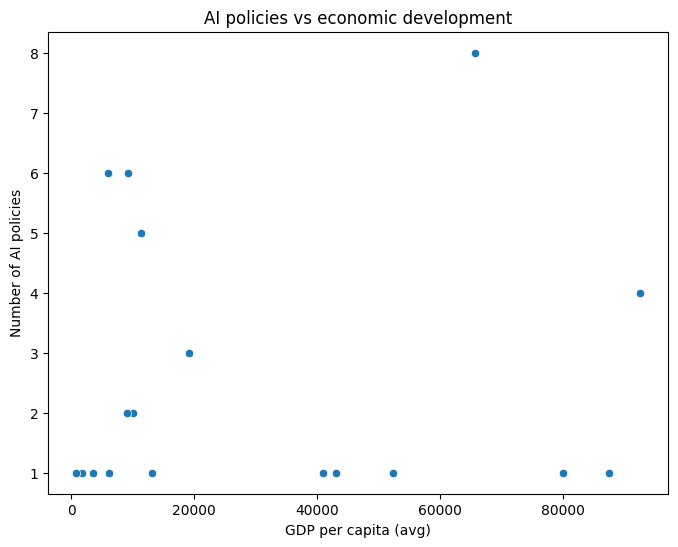

In [200]:
policies_by_country = (
    df_policies_gdp
    .groupby("country")
    .agg(
        n_policies=("policy_initiative_id", "count"),
        avg_gdp=("gdp_per_capita", "mean")
    )
    .dropna()
)


#Dispersión
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=policies_by_country,
    x="avg_gdp",
    y="n_policies"
)
plt.xlabel("GDP per capita (avg)")
plt.ylabel("Number of AI policies")
plt.title("AI policies vs economic development")
plt.show()


In [201]:
df_policies_gdp[["country"]].head(15)  # como DataFrame


,country
0,United Kingdom
1,Colombia
2,Colombia
3,Colombia
4,Colombia
5,Colombia
6,Argentina
7,Argentina
8,Argentina
9,Argentina


In [247]:
policies_by_country = policies_by_country.reset_index()



En el análisis del gráfico, podemos ver de forma general a diferentes paises (representados por un punto).
Según lo que se observa:

Países con GDP alto + muchas políticas
 líderes regulatorios y tecnológicos (UE, EE.UU., etc.)

Países con GDP alto + pocas políticas
 políticas aún no formalizadas

Países con GDP medio/bajo + algunas políticas
 adopción estratégica, presión internacional, cooperación 

In [ ]:
#ÉTICA 

In [ ]:
df_etica.columns


Index(['sector', 'tipo_ia', 'nivel_autonomia', 'transparencia', 'riesgo_sesgo',
       'impacto_social', 'privacidad_datos', 'explicabilidad',
       'cumple_normativa', 'evaluacion_etica'],
      dtype='str')

In [ ]:
#Conversi{on a valor numérico }
ethical_map = {
    "bajo": 1,
    "medio": 2,
    "alto": 3,
    "sí": 3,
    "no": 1
}

for col in df_etica.columns:
    if df_etica[col].dtype == "object":
        df_etica[col] = df_etica[col].map(ethical_map)


In [ ]:
#Creación de Score ético promedio para crecaion de variable
df_etica["ethics_score"] = df_etica.select_dtypes(include="number").mean(axis=1)
df_etica["ethics_score"].round(2).head()
df_etica["ethics_score"].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: ethics_score, dtype: float64

## GDP + Políticas + Ética

In [ ]:
#Agregación por país (políticas + GDP)
analysis_df = (
    df_policies
    .groupby("country")
    .agg(
        n_policies=("policy_initiative_id", "count"),
        avg_year=("year", "mean")
    )
    .reset_index()
)


In [ ]:
#Añadiendo promedio GDP
analysis_df = analysis_df.merge(
    df_gdp.groupby("country")
          .agg(avg_gdp=("gdp_per_capita", "mean"))
          .reset_index(),
    on="country",
    how="left"
)


In [ ]:
#Añadiendo promedio ÉTICA
df_etica["ethics_score"] = (
    df_etica.select_dtypes(include="number").mean(axis=1)
)

analysis_df["avg_ethics"] = df_etica["ethics_score"].mean()



In [ ]:
ethics_numeric = df_etica.select_dtypes(include="number")
global_ethics_score = ethics_numeric.mean().mean()
global_ethics_score


nan

In [ ]:
analysis_df["avg_ethics"] = global_ethics_score


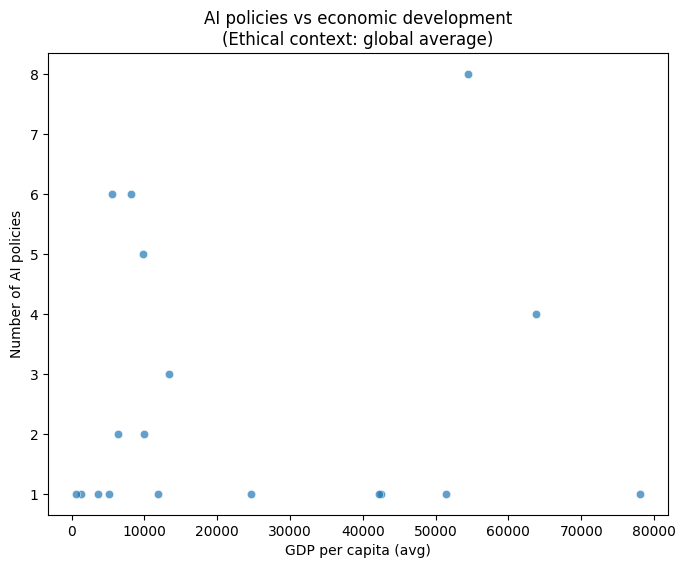

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=analysis_df,
    x="avg_gdp",
    y="n_policies",
    alpha=0.7
)
plt.xlabel("GDP per capita (avg)")
plt.ylabel("Number of AI policies")
plt.title("AI policies vs economic development\n(Ethical context: global average)")
plt.show()


Las evaluaciones éticas no son específicas de cada país en el conjunto de datos. Por lo tanto, la ética se considera una dimensión contextual global, no un indicador nacional.

## ÉTICA E IA POR SECTOR Y FRECUENCIA 

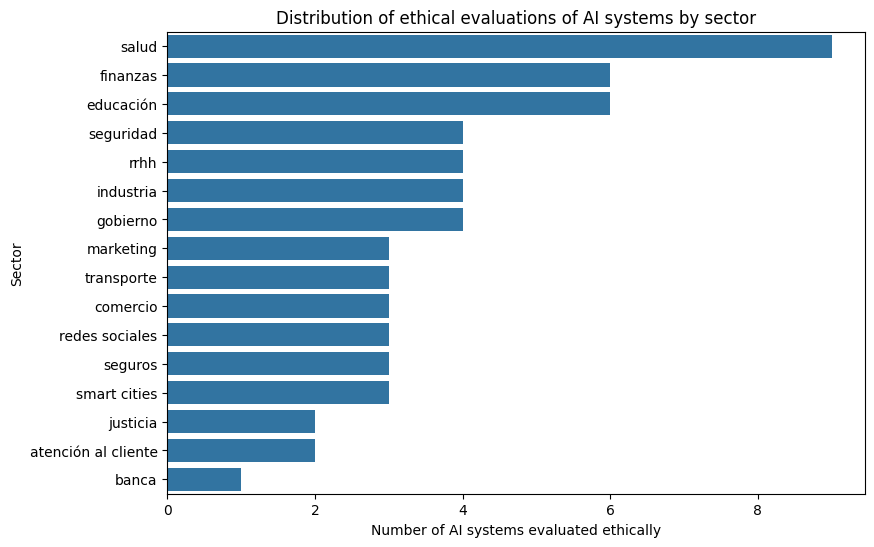

In [ ]:
sector_counts = df_etica["sector"].value_counts().reset_index()
sector_counts.columns = ["sector", "n_systems"]

plt.figure(figsize=(9,6))
sns.barplot(
    data=sector_counts,
    x="n_systems",
    y="sector"
)

plt.xlabel("Number of AI systems evaluated ethically")
plt.ylabel("Sector")
plt.title("Distribution of ethical evaluations of AI systems by sector")
plt.show()


In [204]:
# Aquí no medimos el nivel de ética, sino dónde se está aplicando evaluación ética. 

# Salud lidera claramente (9 sistemas)

# Finanzas y educación aparecen justo detrás

# Sectores críticos como: justicia, banca y atención al cliente están infrarepresentados 

## ÉTICA VS POLÍTICAS PÚBLICAS POR SECTOR


HIPÓTESIS 2:
Los sectores donde se evalúa éticamente la IA son también los sectores más regulados mediante políticas públicas?

In [211]:
#Revisión de políticas públicas 
df_policies_sector = df_policies.copy()

df_policies_sector["sector"] = (
    df_policies_sector["ai_policy_areas"]
    .str.split(",")
    .str[0]
)


In [212]:
policies_by_sector = (
    df_policies_sector["sector"]
    .value_counts()
    .reset_index()
)

policies_by_sector.columns = ["sector", "n_policies"]


In [213]:
#Unión con ética
sector_analysis = ethics_by_sector.merge(
    policies_by_sector,
    on="sector",
    how="left"
)


La clasificación del sector de políticas se derivó del área principal de políticas de IA, reconociendo que muchas iniciativas abarcan múltiples dominios. Esta simplificación permite la comparación a nivel sectorial.

In [215]:
ethics_by_sector = (
    df_etica
    .groupby("sector")
    .size()
    .reset_index(name="n_ethics")
)


In [216]:
ethics_by_sector.head()


,sector,n_ethics
0,atención al cliente,2
1,banca,1
2,comercio,3
3,educación,6
4,finanzas,6


In [219]:
df_policies["themes"].value_counts().head(25)


themes
national ai policies                                           20
ai policy co-ordination and monitoring                         19
ai policy co-ordination and monitoring|national ai policies     5
policies to ensure trustworthy, human-centric ai                3
Name: count, dtype: int64

In [220]:
theme_to_sector = {
    "Health": "salud",
    "Healthcare": "salud",
    "Finance": "finanzas",
    "Education": "educación",
    "Public administration": "gobierno",
    "Security": "seguridad",
    "Transport": "transporte",
    "Labour": "rrhh",
    "Industry": "industria",
    "Justice": "justicia",
    "Digital economy": "comercio",
    "Social media": "redes sociales"
}


In [221]:
df_policies_sector = df_policies.copy()

df_policies_sector["sector"] = (
    df_policies_sector["themes"]
    .str.split(";")
    .str[0]
    .map(theme_to_sector)
)


In [223]:
#Politicas por sector 

policies_by_sector = (
    df_policies_sector
    .dropna(subset=["sector"])
    .groupby("sector")
    .size()
    .reset_index(name="n_policies")
)


In [224]:
#Nuveamnte por si acaso, etica por sector
ethics_by_sector = (
    df_etica
    .groupby("sector")
    .size()
    .reset_index(name="n_ethics")
)


In [225]:
#Union 
sector_analysis = ethics_by_sector.merge(
    policies_by_sector,
    on="sector",
    how="outer"
).fillna(0)


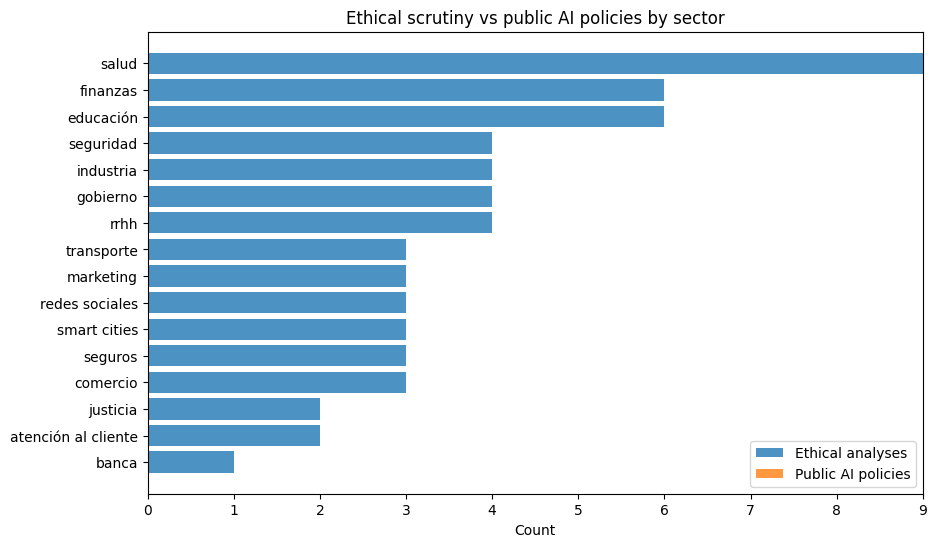

In [226]:
sector_analysis = sector_analysis.sort_values("n_ethics")

plt.figure(figsize=(10,6))

plt.barh(
    sector_analysis["sector"],
    sector_analysis["n_ethics"],
    label="Ethical analyses",
    alpha=0.8
)

plt.barh(
    sector_analysis["sector"],
    sector_analysis["n_policies"],
    left=sector_analysis["n_ethics"],
    label="Public AI policies",
    alpha=0.8
)

plt.xlabel("Count")
plt.title("Ethical scrutiny vs public AI policies by sector")
plt.legend()
plt.show()


# ¿Que paises han desarrollado marcos de gobernanza sobre IA?


In [227]:
#Definiendo marco regulatorio
df_policies["policy_instrument_type_category"].value_counts()


policy_instrument_type_category
governance    47
Name: count, dtype: int64

In [239]:
#Construccion del Dataset
df_governance= df_policies.copy

In [ ]:
#Redefinir governance

df_governance = df_policies.copy()

del df_governance
df_governance = df_policies.copy()


In [243]:
#Conteo por pais 
governance_by_country = (
    df_governance
    .groupby("country")
    .size()
    .reset_index(name="n_governance_policies")
    .sort_values("n_governance_policies", ascending=False)
)


In [244]:
governance_by_country.head()


,country,n_governance_policies
17,United States,8
3,Colombia,6
1,Brazil,6
0,Argentina,5
5,Ireland,4


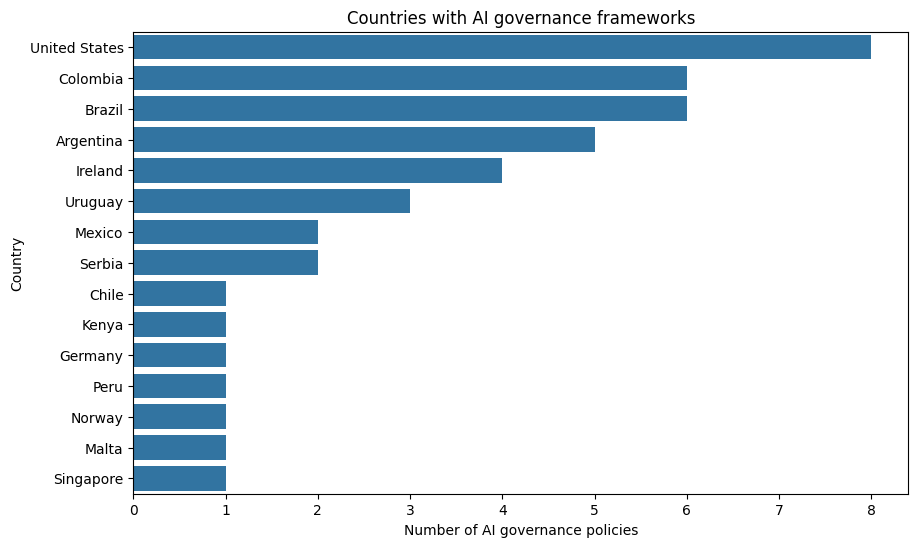

In [245]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=governance_by_country.head(15),
    x="n_governance_policies",
    y="country"
)

plt.title("Countries with AI governance frameworks")
plt.xlabel("Number of AI governance policies")
plt.ylabel("Country")
plt.show()


# En lugar de una regulación formal, el desarrollo de políticas de IA se enmarca predominantemente como gobernanza. 
# Esto limita las comparaciones entre países de la capacidad regulatoria formal, pero permite un análisis comparativo de la intensidad de la gobernanza.
# En este caso y en la actualidad se puede analizar como el poder recae directamente no en quien o lo  que se deberia regular, si no en quien se encuentra al mando 

In [264]:
para push

SyntaxError: invalid syntax (2133320454.py, line 1)